In [1]:
import warnings
warnings.filterwarnings("ignore")

In [5]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from collections import Counter

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

from sklearn.model_selection import RandomizedSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [6]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [7]:
print('Number of duplicates in train:',sum(train.duplicated()))
print('Number of duplicates in test:',sum(test.duplicated()))

Number of duplicates in train: 0
Number of duplicates in test: 0


In [8]:
print('Total numbe of missing values in train:', train.isna().values.sum())
print('Total numbe of missing values in test:', test.isna().values.sum())

Total numbe of missing values in train: 0
Total numbe of missing values in test: 0


<AxesSubplot:title={'center':'BARPLOT OF ACTIVITY'}, xlabel='Activity', ylabel='count'>

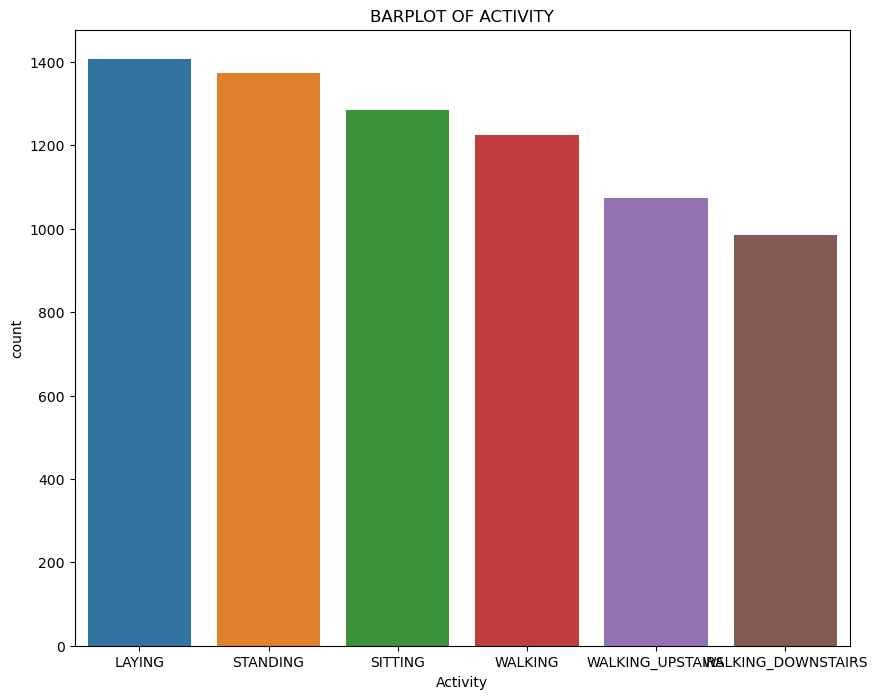

In [9]:
plt.figure(figsize=(10,8))
plt.title('BARPLOT OF ACTIVITY')
sns.countplot(train.Activity, order = train.Activity.value_counts().index)

In [10]:
pd.DataFrame.from_dict(Counter([col.split('-')[0].split('(')[0] for col in train.columns]),
                      orient = "index").rename(columns={0:'count'}).sort_values('count', ascending=False)

,count
fBodyAcc,79
fBodyGyro,79
fBodyAccJerk,79
tGravityAcc,40
tBodyAcc,40
tBodyGyroJerk,40
tBodyGyro,40
tBodyAccJerk,40
tBodyAccMag,13
tGravityAccMag,13


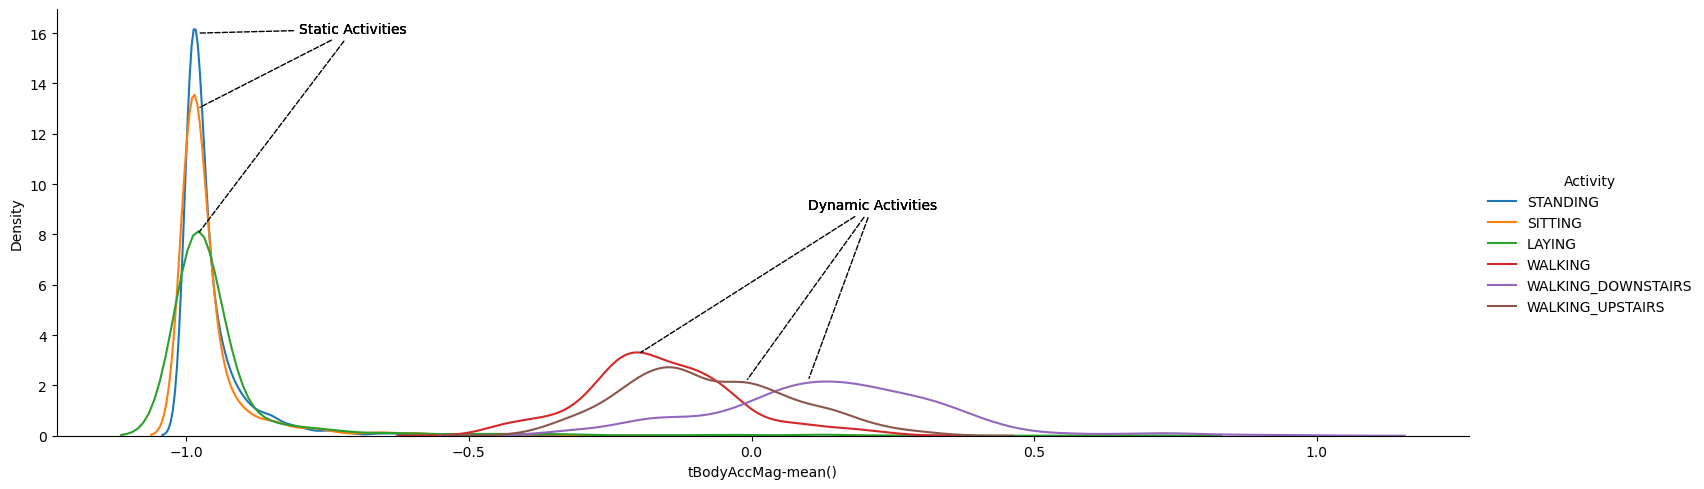

In [12]:
facetgrid = sns.FacetGrid(train, hue = 'Activity', height = 5, aspect = 3)
facetgrid.map(sns.distplot, 'tBodyAccMag-mean()', hist = False).add_legend()

plt.annotate("Static Activities", xy = (-.98, 8), xytext = (-.8, 16), arrowprops={'arrowstyle':'-', 'ls': 'dashed'})
plt.annotate("Static Activities", xy = (-.98, 13), xytext = (-.8, 16), arrowprops={'arrowstyle':'-', 'ls': 'dashed'})
plt.annotate("Static Activities", xy = (-.98, 16), xytext = (-.8, 16), arrowprops={'arrowstyle':'-', 'ls': 'dashed'})

plt.annotate("Dynamic Activities", xy = (-0.2, 3.25), xytext = (0.1, 9), arrowprops={'arrowstyle':'-', 'ls': 'dashed'})
plt.annotate("Dynamic Activities", xy = (0.1, 2.18), xytext = (0.1, 9), arrowprops={'arrowstyle':'-', 'ls': 'dashed'})
plt.annotate("Dynamic Activities", xy = (-0.01, 2.15), xytext = (0.1, 9), arrowprops={'arrowstyle':'-', 'ls': 'dashed'})

plt.show()

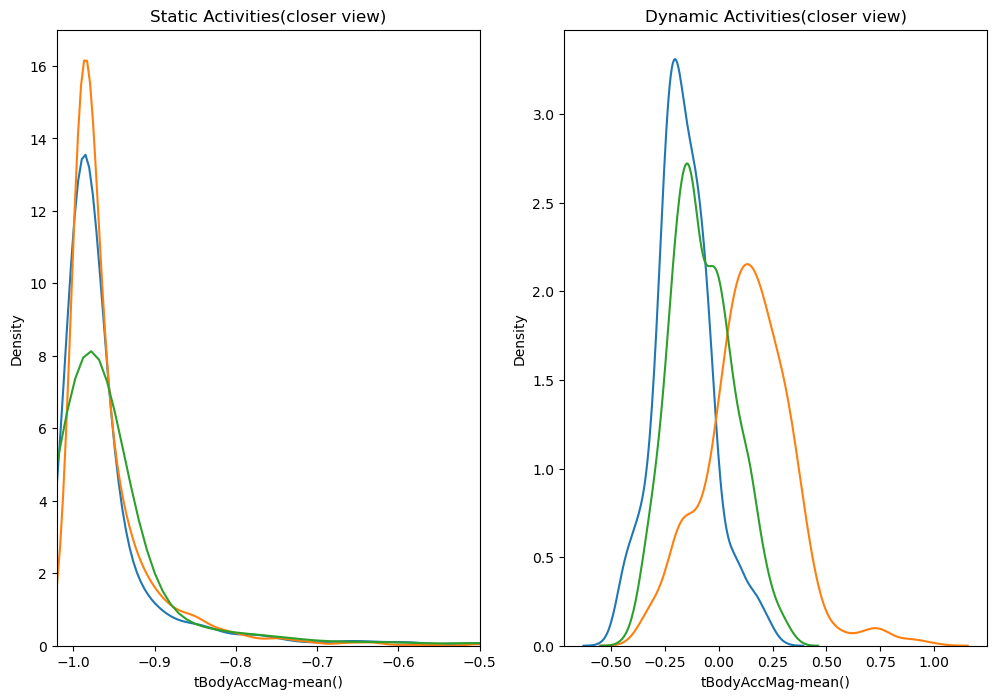

In [13]:
plt.figure(figsize=(12,8))
plt.subplot(1,2,1)
plt.title('Static Activities(closer view)')
sns.distplot(train[train["Activity"]=="SITTING"]['tBodyAccMag-mean()'],hist = False, label = 'Sitting')
sns.distplot(train[train["Activity"]=="STANDING"]['tBodyAccMag-mean()'],hist = False, label = 'Standing')
sns.distplot(train[train["Activity"]=="LAYING"]['tBodyAccMag-mean()'],hist = False, label = 'Laying')
plt.axis([-1.02, -0.5, 0, 17])
plt.subplot(1,2,2)
plt.title("Dynamic Activities(closer view)")
sns.distplot(train[train["Activity"]=="WALKING"]['tBodyAccMag-mean()'],hist = False, label = 'WALKING')
sns.distplot(train[train["Activity"]=="WALKING_DOWNSTAIRS"]['tBodyAccMag-mean()'],hist = False, label = 'WALKING_DOWNDTAIRS')
sns.distplot(train[train["Activity"]=="WALKING_UPSTAIRS"]['tBodyAccMag-mean()'],hist = False, label = 'WALKING_UPSTAIRS')
plt.show()


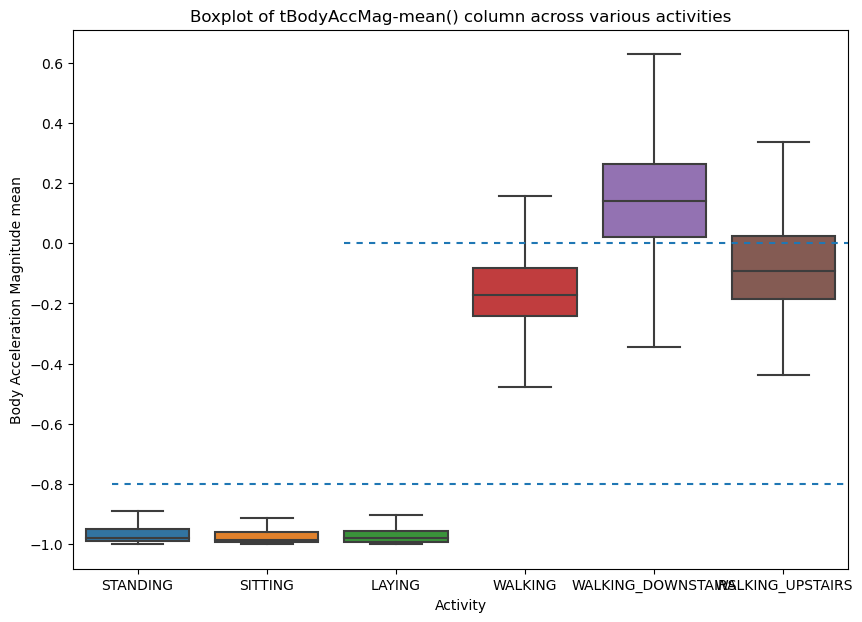

In [14]:
plt.figure(figsize=(10,7))
sns.boxplot(x = "Activity", y="tBodyAccMag-mean()", data = train, showfliers = False)
plt.ylabel('Body Acceleration Magnitude mean')
plt.title("Boxplot of tBodyAccMag-mean() column across various activities")
plt.axhline(y = -0.8, xmin = 0.05, dashes = (3,3))
plt.axhline(y= 0.0, xmin = 0.35, dashes=(3,3))
plt.show()

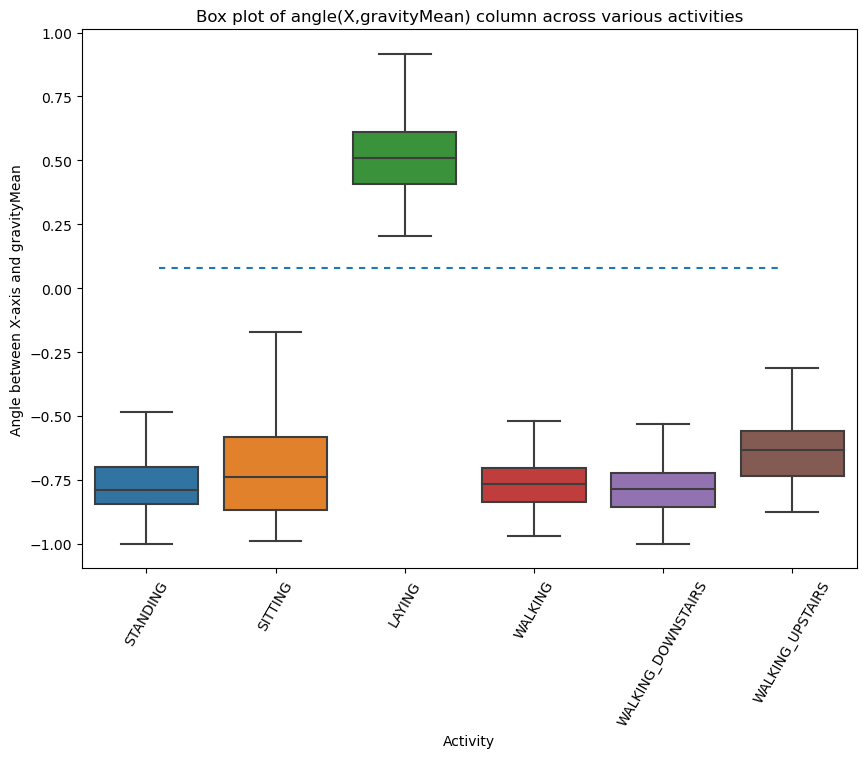

In [19]:
plt.figure(figsize=(10,7))
sns.boxplot(x='Activity', y='angle(X,gravityMean)', data=train, showfliers=False)
plt.axhline(y=0.08, xmin=0.1, xmax=0.9, dashes=(3,3))
plt.ylabel("Angle between X-axis and gravityMean")
plt.title('Box plot of angle(X,gravityMean) column across various activities')
plt.xticks(rotation = 60)
plt.show()

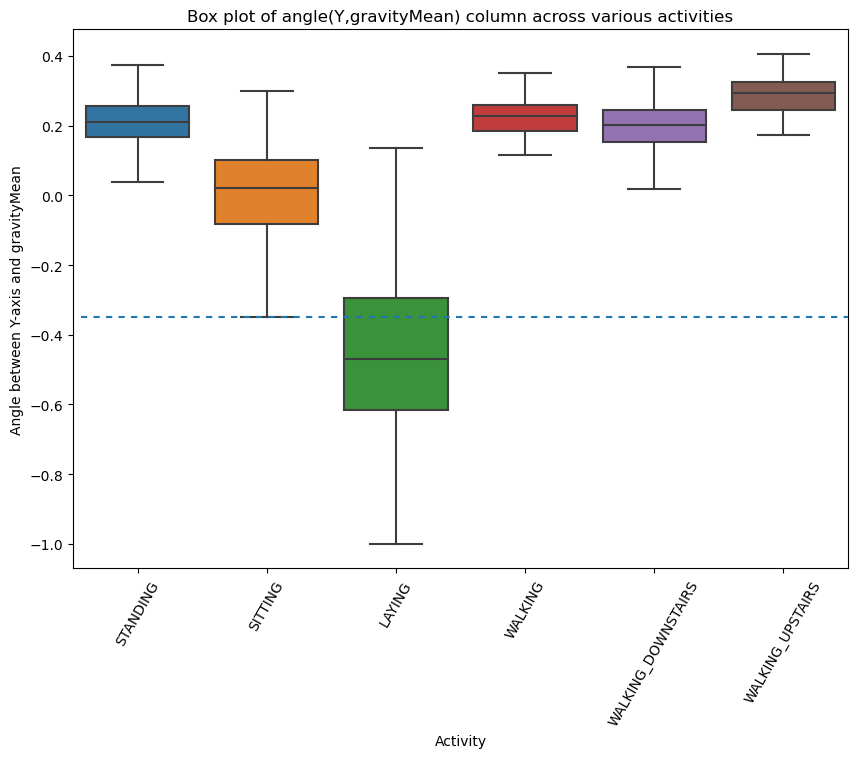

In [20]:
plt.figure(figsize=(10,7))
sns.boxplot(x='Activity', y='angle(Y,gravityMean)', data=train, showfliers=False)
plt.axhline(y=-0.35, xmin=0.01, dashes=(3,3))
plt.ylabel("Angle between Y-axis and gravityMean")
plt.title('Box plot of angle(Y,gravityMean) column across various activities')
plt.xticks(rotation = 60)
plt.show()

In [21]:
x_for_pca = train.drop(['subject', 'Activity'], axis = 1)
pca = PCA(n_components = 2, random_state = 0).fit_transform(x_for_pca)

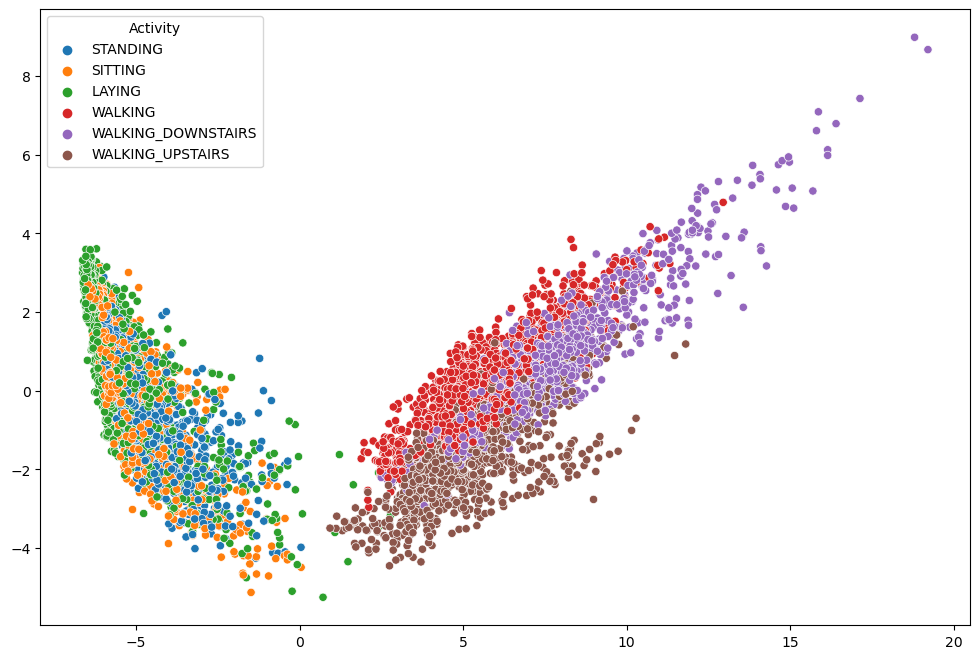

In [22]:
plt.figure(figsize=(12,8))
sns.scatterplot(x=pca[:, 0], y = pca[:, 1], hue = train['Activity'])
plt.show()

In [24]:
x_for_tsne = train.drop(['subject', 'Activity'], axis = 1)
tsne = TSNE(n_components = 2, random_state = 0, n_iter=1000).fit_transform(x_for_tsne)

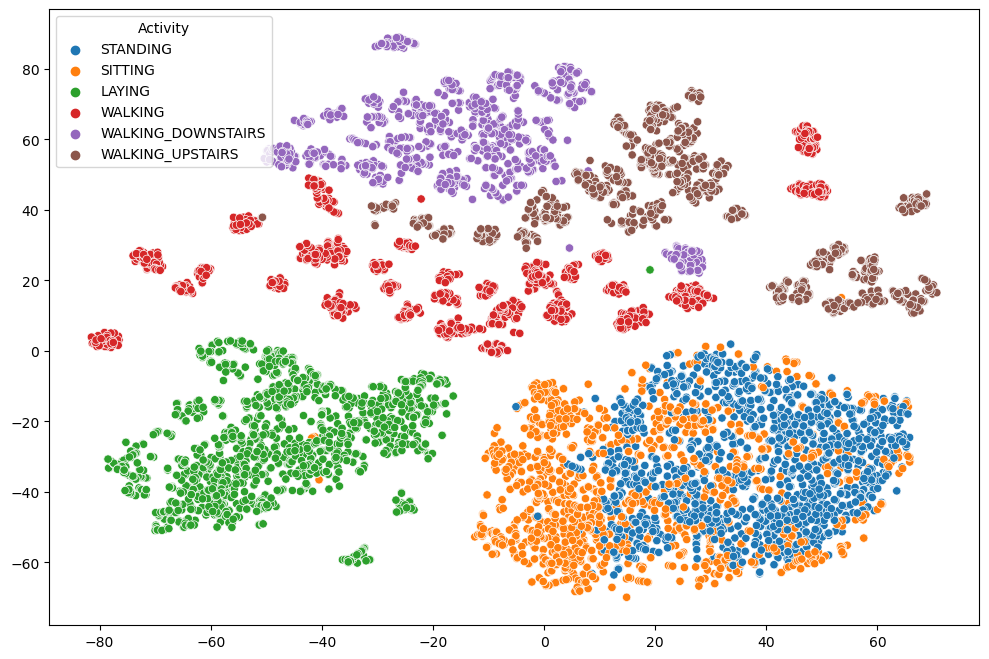

In [25]:
plt.figure(figsize=(12,8))
sns.scatterplot(x=tsne[:,0], y=tsne[:, 1], hue=train['Activity'])
plt.show()

In [26]:
X_train = train.drop(['subject', 'Activity'], axis = 1)
y_train = train.Activity

X_test = test.drop(['subject', 'Activity'], axis = 1)
y_test = test.Activity

In [27]:
print('Training data size : ', X_train.shape)
print('Test data size:', X_test.shape)

Training data size :  (7352, 561)
Test data size: (999, 561)


In [29]:
parameters = {'max_iter': [100,200,500]}
lr_classifier = LogisticRegression()
lr_classifier_rs = RandomizedSearchCV(lr_classifier, param_distributions= parameters, cv=5, random_state=42)
lr_classifier_rs.fit(X_train, y_train)
y_pred_lr = lr_classifier_rs.predict(X_test)

In [30]:
lr_accuracy = accuracy_score(y_true=y_test, y_pred=y_pred_lr)
print("Accuracy using Logistic Regression: ", lr_accuracy)

Accuracy using Logistic Regression:  0.954954954954955


In [60]:
#function for confusion matrix
def plot_confusion_matrix(cm,labels):
    fig, ax=plt.subplots(figsize=(12,8))#for plotting it as image
    im=ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
    yticks=np.arange(cm.shape[0]),
    xticklabels=labels, yticklabels=labels,
    ylabel='True label',
    xlabel='Predicted label')
    plt.xticks(rotation=90)
    thresh=cm.max()/2
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j,i,int(cm[i, j]),ha="center", va="center",color="white" if cm[i, j]>thresh else "black")
    fig.tight_layout()

In [49]:
cm = confusion_matrix(y_test.values, y_pred_lr)
cm

array([[183,   0,   0,   0,   0,   0],
       [  0, 146,  21,   0,   0,   3],
       [  0,   8, 170,   0,   0,   0],
       [  0,   0,   0, 185,   0,   0],
       [  0,   0,   0,   0, 134,   0],
       [  0,   0,   0,  13,   0, 136]], dtype=int64)

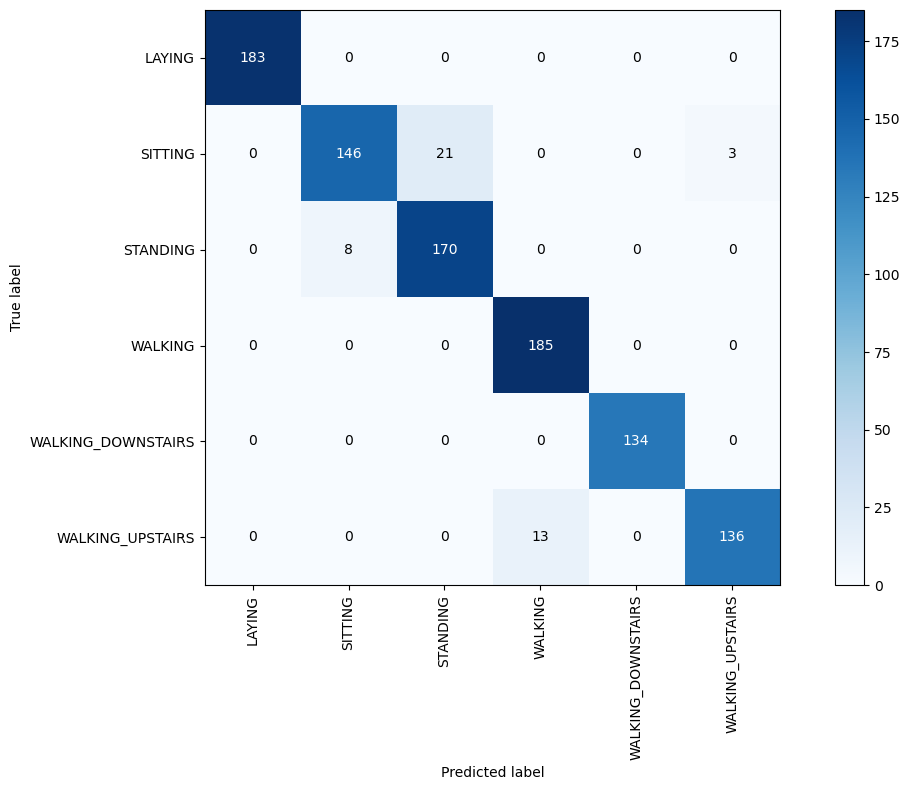

In [50]:
cm = confusion_matrix(y_test.values, y_pred_lr)
plot_confusion_matrix(cm, np.unique(y_pred_lr))

In [51]:
#function to get best random search attributes
def get_best_randomsearch_results(model):
    print("Best estimator : ", model.best_estimator_)
    print("Best set of parameters : ", model.best_params_)

In [52]:
get_best_randomsearch_results(lr_classifier_rs)

Best estimator :  LogisticRegression(max_iter=200)
Best set of parameters :  {'max_iter': 200}


In [54]:
parameters = {
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    'C':[100,50]
}

svm_rs = RandomizedSearchCV(SVC(), param_distributions=parameters, cv=3, random_state=42)
svm_rs.fit(X_train, y_train)

RandomizedSearchCV(cv=3, estimator=SVC(),
                   param_distributions={'C': [100, 50],
                                        'kernel': ['linear', 'rbf', 'poly',
                                                   'sigmoid']},
                   random_state=42)

In [63]:
y_pred=svm_rs.predict(X_test)

In [64]:
kernel_svm_accuracy = accuracy_score(y_true=y_test, y_pred = y_pred)
print("Accuracy using Kernel SVM: ", kernel_svm_accuracy)

Accuracy using Kernel SVM:  0.965965965965966


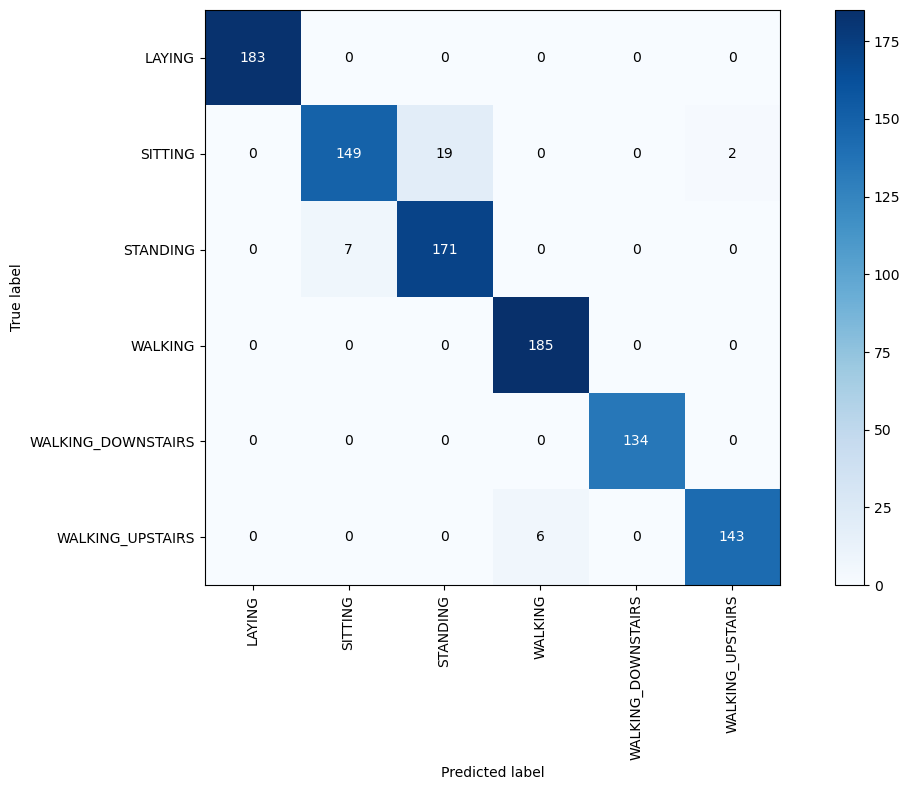

In [65]:
cm=confusion_matrix(y_test.values, y_pred)
plot_confusion_matrix(cm, np.unique(y_pred))

In [68]:
parameters = {'max_depth': np.arange(2,10,2)}

dt_classifier = DecisionTreeClassifier()
dt_classifier_rs=RandomizedSearchCV(dt_classifier, param_distributions=parameters, random_state=42)
dt_classifier_rs.fit(X_train, y_train)

RandomizedSearchCV(estimator=DecisionTreeClassifier(),
                   param_distributions={'max_depth': array([2, 4, 6, 8])},
                   random_state=42)

In [69]:
y_pred=dt_classifier_rs.predict(X_test)

In [70]:
dt_accuracy=accuracy_score(y_true=y_test, y_pred=y_pred)
print("Accuracy using Decision tree: ", dt_accuracy)

Accuracy using Decision tree:  0.8448448448448449


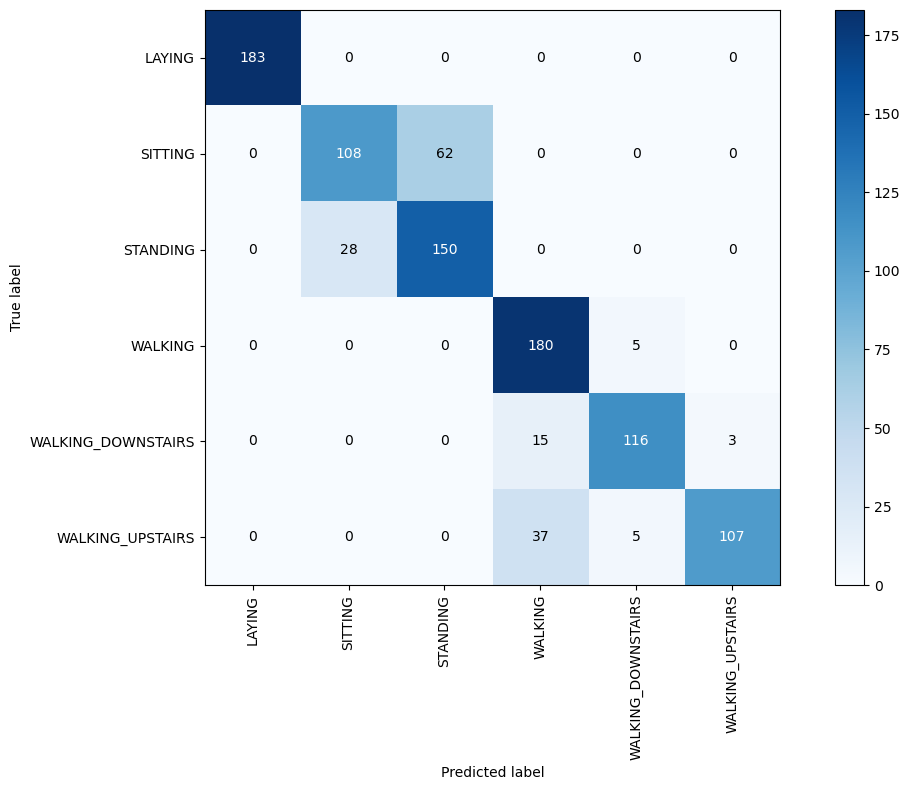

In [71]:
cm=confusion_matrix(y_test.values, y_pred)
plot_confusion_matrix(cm, np.unique(y_pred))

In [75]:
parameters={
    'n_estimators':np.arange(20,101,10),
    'max_depth': np.arange(2,17,2)
}
rf_classifier=RandomForestClassifier()
rf_classifier_rs=RandomizedSearchCV(rf_classifier, param_distributions=parameters, random_state=42)
rf_classifier_rs.fit(X_train, y_train)

RandomizedSearchCV(estimator=RandomForestClassifier(),
                   param_distributions={'max_depth': array([ 2,  4,  6,  8, 10, 12, 14, 16]),
                                        'n_estimators': array([ 20,  30,  40,  50,  60,  70,  80,  90, 100])},
                   random_state=42)

In [76]:
get_best_randomsearch_results(rf_classifier_rs)

Best estimator :  RandomForestClassifier(max_depth=12, n_estimators=70)
Best set of parameters :  {'n_estimators': 70, 'max_depth': 12}


In [77]:
y_pred=rf_classifier_rs.predict(X_test)

In [78]:
rf_accuracy=accuracy_score(y_true=y_test, y_pred=y_pred)
print("Accuracy using Random forest: ", rf_accuracy)

Accuracy using Random forest:  0.918918918918919


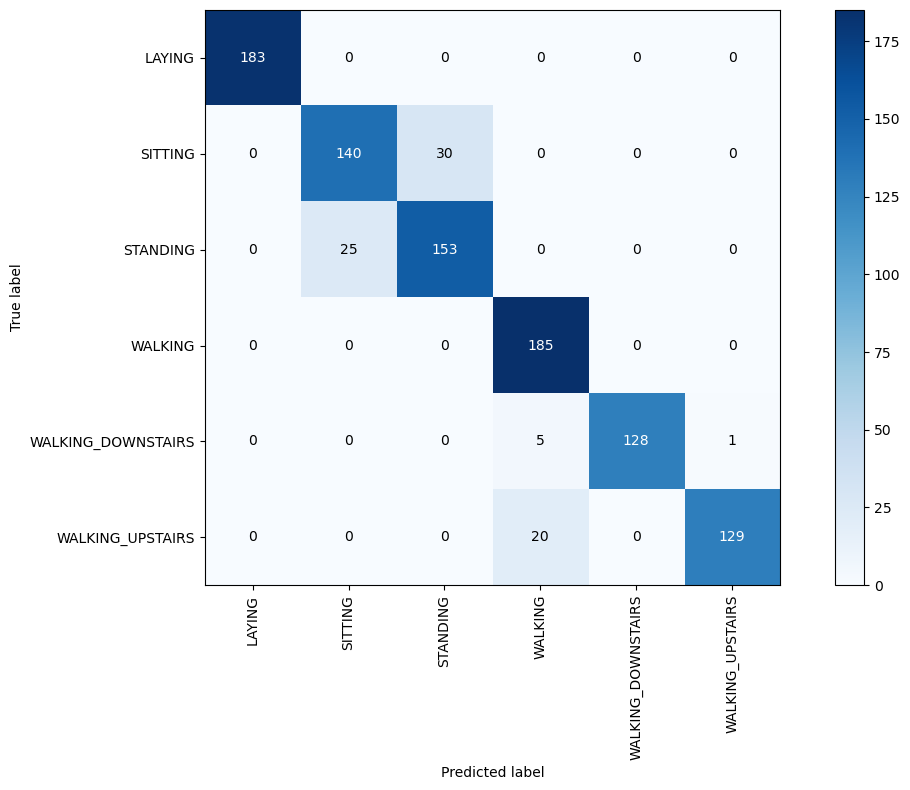

In [79]:
cm=confusion_matrix(y_test.values, y_pred)
plot_confusion_matrix(cm, np.unique(y_pred))